<a href="https://colab.research.google.com/github/diegofuentes51/LAB06/blob/main/LAB06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [14]:
#MINERÍA DE DATOS - SEMANA 6
#Algoritmos para diferentes tipos de tareas. Validación cruzada y métricas de evaluación. Clases desbalanceadas
#Laboratorio Calificado
#Nombre: DIEGO ALONSO FUENTES ARELLANO , TORRES ALVARADO, FABRICIO ISMAEL

In [15]:
# Instalar librerías necesarias
!pip install ucimlrepo imblearn
# Importar librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (classification_report, confusion_matrix,
                            accuracy_score, precision_score,
                            recall_score, f1_score, roc_auc_score)
from imblearn.over_sampling import SMOTE
from sklearn.impute import SimpleImputer
# Configuración de visualización
plt.style.use('ggplot')
%matplotlib inline

Metadatos del dataset
{'uci_id': 15, 'name': 'Breast Cancer Wisconsin (Original)', 'repository_url': 'https://archive.ics.uci.edu/dataset/15/breast+cancer+wisconsin+original', 'data_url': 'https://archive.ics.uci.edu/static/public/15/data.csv', 'abstract': 'Original Wisconsin Breast Cancer Database', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 699, 'num_features': 9, 'feature_types': ['Integer'], 'demographics': [], 'target_col': ['Class'], 'index_col': ['Sample_code_number'], 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 1990, 'last_updated': 'Sun Mar 10 2024', 'dataset_doi': '10.24432/C5HP4Z', 'creators': ['WIlliam Wolberg'], 'intro_paper': None, 'additional_info': {'summary': "Samples arrive periodically as Dr. Wolberg reports his clinical cases. The database therefore reflects this chronological grouping of the data. This grouping information appears immediately below, h

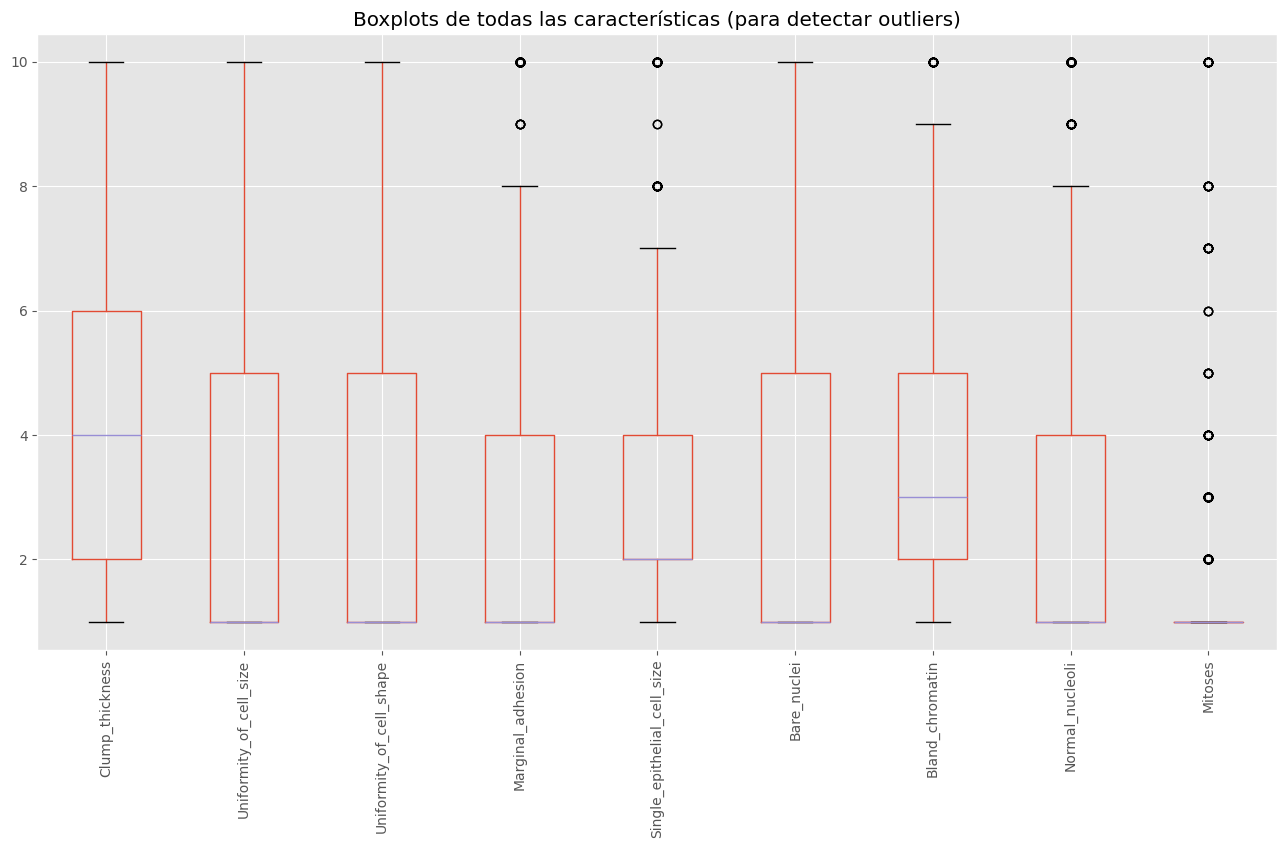

Escalado de datos
División de datos
Train: 524 muestras | Test: 175 muestras
Distribución en train:
Class
0    343
1    181
Name: count, dtype: int64
Distribución en test:
Class
0    115
1     60
Name: count, dtype: int64


In [16]:
#1.a. Preprocesamiento de datos
# Cargar dataset específico
breast_cancer_wisconsin_original = fetch_ucirepo(id=15)
# Obtener datos y metadatos
X = breast_cancer_wisconsin_original.data.features
y = breast_cancer_wisconsin_original.data.targets
# Mostrar metadatos
print("Metadatos del dataset")
print(breast_cancer_wisconsin_original.metadata)
# Mostrar información de variables
print("Información de variables")
print(breast_cancer_wisconsin_original.variables)
# Preprocesamiento inicial
print("Información inicial")
print("Dimensiones de X:", X.shape)
print("Distribución de clases:")
print(y['Class'].value_counts())
# Verificar valores nulos
print("nValores nulos por columna:")
print(X.isnull().sum())
# Tratamiento de missing values (la columna Bare_Nuclei tiene valores '?')
print("Tratamiento de valores faltantes")
# Convertir '?' a NaN
X = X.replace('?', np.nan)
# Verificar nuevamente valores nulos
print("Valores nulos después de convertir '?':")
print(X.isnull().sum())
# Imputar valores faltantes con la mediana
imputer = SimpleImputer(strategy='median')
X_imputed = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
print("Valores nulos después de imputación:")
print(X_imputed.isnull().sum())
# Convertir a tipo numérico (por si acaso)
X_processed = X_imputed.astype(float)
# Procesar variable objetivo (convertir a 0 y 1)
y_processed = y['Class'].map({2: 0, 4: 1})  # 0 para benigno (2), 1 para maligno (4)
print("Distribución de clases procesada:")
print(y_processed.value_counts())
# Detección de outliers
print("Análisis de outliers")
plt.figure(figsize=(16, 8))
X_processed.boxplot()
plt.xticks(rotation=90)
plt.title("Boxplots de todas las características (para detectar outliers)")
plt.show()
# Escalado de datos
print("Escalado de datos")
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_processed)
X_scaled = pd.DataFrame(X_scaled, columns=X_processed.columns)
# División train-test
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_processed, test_size=0.25, random_state=42, stratify=y_processed)
print("División de datos")
print(f"Train: {X_train.shape[0]} muestras | Test: {X_test.shape[0]} muestras")
print("Distribución en train:")
print(y_train.value_counts())
print("Distribución en test:")
print(y_test.value_counts())

Determinación del número óptimo de vecinos (k)


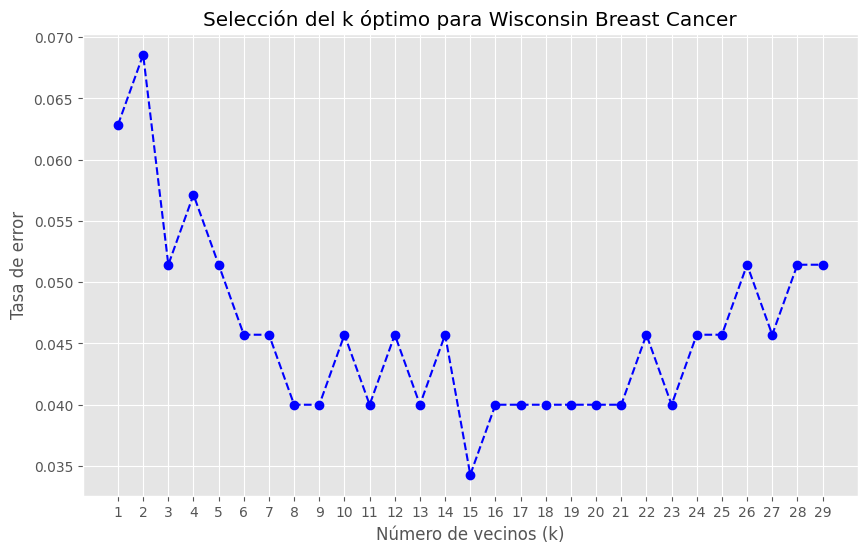

nEl valor óptimo de k es: 15
Entrenamiento del modelo con k óptimo
Métricas de evaluación
Matriz de confusión:


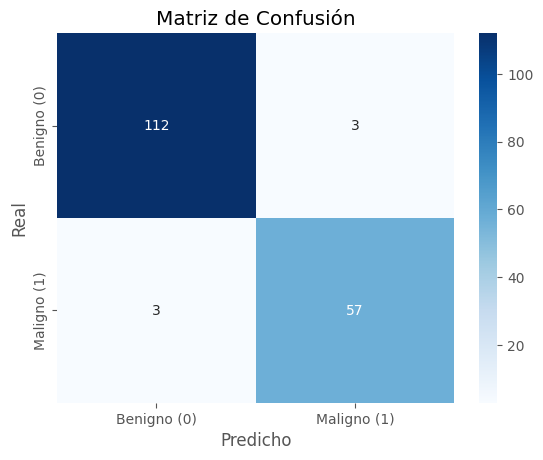

nReporte de clasificación:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        60

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Otras métricas importantes:
Accuracy: 0.9657
Precision: 0.9500
Recall: 0.9500
F1-Score: 0.9500
AUC-ROC: 0.9620


<Figure size 800x600 with 0 Axes>

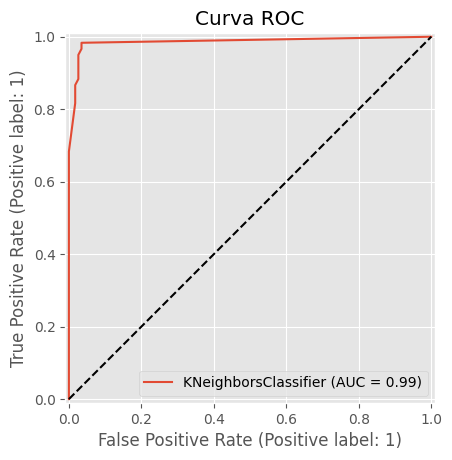

In [22]:
#1.b. Modelo k-NN y métricas de evaluación
#Determinación del k óptimo
print("Determinación del número óptimo de vecinos (k)")

error_rates = []
k_range = range(1, 30)

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred = knn.predict(X_test)
    error_rates.append(np.mean(pred != y_test))

# Gráfico de error vs k
plt.figure(figsize=(10, 6))
plt.plot(k_range, error_rates, marker='o', linestyle='--', color='blue')
plt.xlabel('Número de vecinos (k)')
plt.ylabel('Tasa de error')
plt.title('Selección del k óptimo para Wisconsin Breast Cancer')
plt.xticks(k_range)
plt.grid(True)
plt.show()
optimal_k = k_range[np.argmin(error_rates)]
print(f"nEl valor óptimo de k es: {optimal_k}")
# Entrenamiento del modelo con k óptimo
print("Entrenamiento del modelo con k óptimo")
knn = KNeighborsClassifier(n_neighbors=optimal_k)
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
# Métricas de evaluación
print("Métricas de evaluación")
# Matriz de confusión
print("Matriz de confusión:")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Benigno (0)', 'Maligno (1)'],
            yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

# Reporte completo
print("nReporte de clasificación:")
print(classification_report(y_test, y_pred))

# Métricas adicionales
print("Otras métricas importantes:")
metrics_dict = {
    'Accuracy': accuracy_score(y_test, y_pred),
    'Precision': precision_score(y_test, y_pred),
    'Recall': recall_score(y_test, y_pred),
    'F1-Score': f1_score(y_test, y_pred),
    'AUC-ROC': roc_auc_score(y_test, y_pred)
}

for metric, value in metrics_dict.items():
    print(f"{metric}: {value:.4f}")

# Curva ROC
from sklearn.metrics import RocCurveDisplay
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(knn, X_test, y_test)
plt.title('Curva ROC')
plt.plot([0, 1], [0, 1], 'k--')
plt.show()

Aplicación de SMOTE
Distribución original en entrenamiento:
Class
0    343
1    181
Name: count, dtype: int64
Distribución después de SMOTE:
Class
0    343
1    343
Name: count, dtype: int64
Modelo con datos balanceados
Métricas con SMOTE
Matriz de confusión con SMOTE:


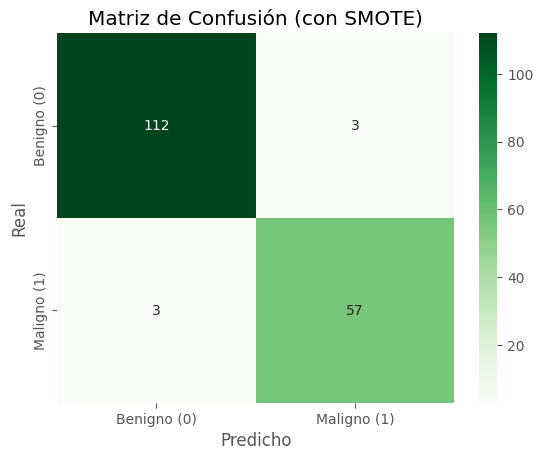

Reporte de clasificación con SMOTE:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       115
           1       0.95      0.95      0.95        60

    accuracy                           0.97       175
   macro avg       0.96      0.96      0.96       175
weighted avg       0.97      0.97      0.97       175

Comparación de métricas
Tabla comparativa:


/usr/local/lib/python3.11/dist-packages/pandas/io/formats/style.py:4040: RuntimeWarning: invalid value encountered in scalar divide
  end = (x - left) / (right - left)


,Métrica,Original,Con SMOTE,Diferencia
0,Accuracy,0.9657,0.9657,0.0000
1,Precision,0.9500,0.9500,0.0000
2,Recall,0.9500,0.9500,0.0000
3,F1-Score,0.9500,0.9500,0.0000
4,AUC-ROC,0.9620,0.9620,0.0000


Gráfico comparativo:


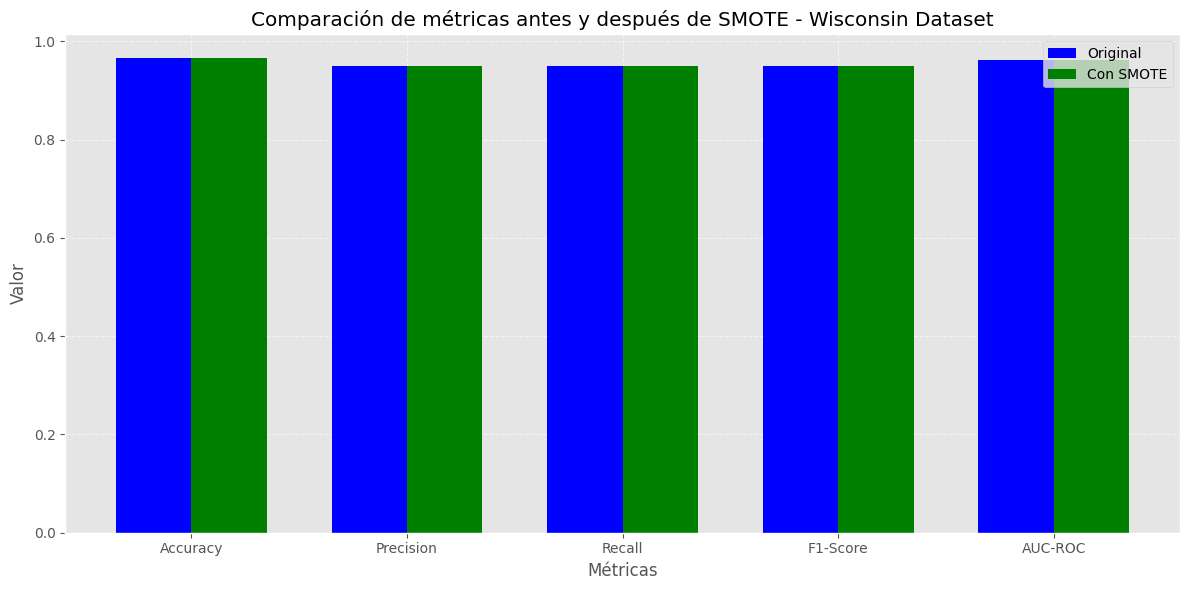

<Figure size 800x600 with 0 Axes>

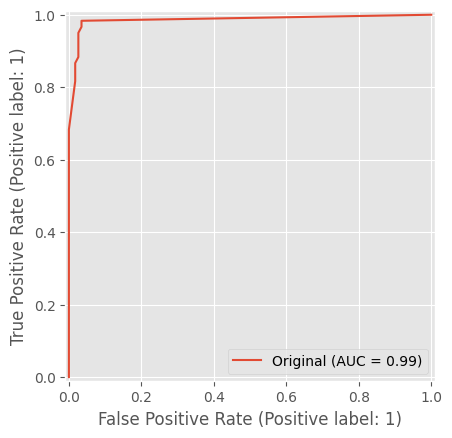

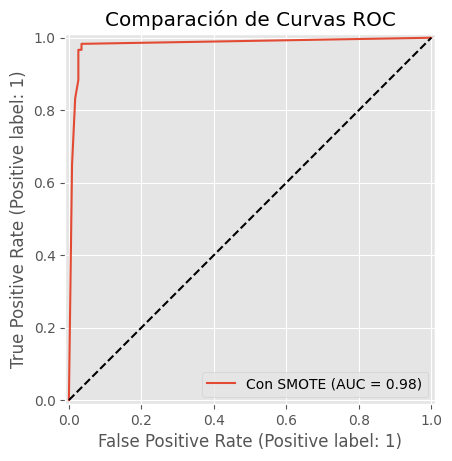

In [19]:
#1.c. Balanceo de clases con SMOTE
# Aplicación de SMOTE
print("Aplicación de SMOTE")
print("Distribución original en entrenamiento:")
print(y_train.value_counts())
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
print("Distribución después de SMOTE:")
print(pd.Series(y_train_smote).value_counts())
# Modelo con datos balanceados
print("Modelo con datos balanceados")
knn_smote = KNeighborsClassifier(n_neighbors=optimal_k)
knn_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = knn_smote.predict(X_test)
# Métricas con SMOTE
print("Métricas con SMOTE")
# Matriz de confusión
print("Matriz de confusión con SMOTE:")
conf_matrix_smote = confusion_matrix(y_test, y_pred_smote)
sns.heatmap(conf_matrix_smote, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Benigno (0)', 'Maligno (1)'],
            yticklabels=['Benigno (0)', 'Maligno (1)'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión (con SMOTE)')
plt.show()
# Reporte completo
print("Reporte de clasificación con SMOTE:")
print(classification_report(y_test, y_pred_smote))
# %%
# Comparación de métricas
print("Comparación de métricas")
# Datos para comparación
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'AUC-ROC']
original_metrics = [
    accuracy_score(y_test, y_pred),
    precision_score(y_test, y_pred),
    recall_score(y_test, y_pred),
    f1_score(y_test, y_pred),
    roc_auc_score(y_test, y_pred)
]

smote_metrics = [
    accuracy_score(y_test, y_pred_smote),
    precision_score(y_test, y_pred_smote),
    recall_score(y_test, y_pred_smote),
    f1_score(y_test, y_pred_smote),
    roc_auc_score(y_test, y_pred_smote)
]

# Tabla comparativa
comparison_df = pd.DataFrame({
    'Métrica': metrics,
    'Original': original_metrics,
    'Con SMOTE': smote_metrics,
    'Diferencia': np.array(smote_metrics) - np.array(original_metrics)
})

print("Tabla comparativa:")
display(comparison_df.style.format({
    'Original': '{:.4f}',
    'Con SMOTE': '{:.4f}',
    'Diferencia': '{:.4f}'
}).bar(subset=['Diferencia'], align='mid', color=['#d65f5f', '#5fba7d']))
# Gráfico comparativo
print("Gráfico comparativo:")
plt.figure(figsize=(12, 6))
bar_width = 0.35
index = np.arange(len(metrics))

bars1 = plt.bar(index, original_metrics, bar_width, label='Original', color='blue')
bars2 = plt.bar(index + bar_width, smote_metrics, bar_width, label='Con SMOTE', color='green')

plt.xlabel('Métricas')
plt.ylabel('Valor')
plt.title('Comparación de métricas antes y después de SMOTE - Wisconsin Dataset')
plt.xticks(index + bar_width / 2, metrics)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
# Curva ROC comparativa
plt.figure(figsize=(8, 6))
RocCurveDisplay.from_estimator(knn, X_test, y_test, name='Original')
RocCurveDisplay.from_estimator(knn_smote, X_test, y_test, name='Con SMOTE')
plt.title('Comparación de Curvas ROC')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.show()